# K-Nearest Neighbors - Iris Plant Classification

# STEP #0: PROBLEM STATEMENT

# Predict the class of an Iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes representing class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

# STEP #1: IMPORT LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv("Iris.csv")

# STEP #2: EXPLORING THE DATASET  

In [ ]:
# AFTER IMPORTING THE DATA, I TYPICALLY VIEW THE FIRST FEW ROWS USING HEAD() TO GET FAMILIAR WITH THE DATA

In [3]:
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
# IT'S ALSO HELPFUL TO USE TAIL() TO SEE THE LAST FEW ROWS TO CONFIRM THE NUMBER OF OBSERVATIONS. IN THIS CASE, WE HAVE 50 OBSERVATIONS FOR EACH CLASS OF IRIS

In [4]:
iris.tail()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

In [ ]:
# I USE SEABORN'S VISUALIZATION FUNCTIONS TO LOOK FOR CORRELATIONS BETWEEN KEY FEATURES AND SEPARATION

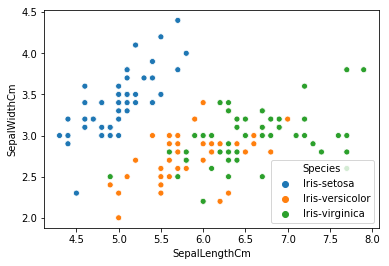

In [6]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, hue="Species")

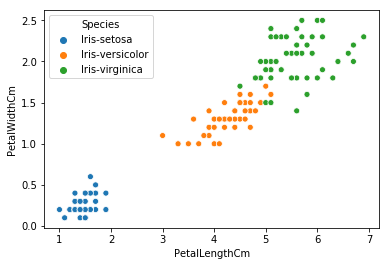

In [7]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, hue="Species")

In [ ]:
# THE VIOLIN PLOT IS USEFUL FOR SEEING THE MEAN AND SPREAD OF DATA ACROSS EACH CLASS FOR FEATURES LIKE PETAL LENGTH AND WIDTH
# THE GRAPHS REVEAL A SMALLER MEAN PETAL LENGTH AND WIDTH FOR THE SETOSA CLASS AND QUITE A BIT OF VARIATION BETWEEN THE THREE CLASSES
# ON THE OTHER HAND, THERE IS LESS VARIATION WITH SEPAL LENGTH AND WIDTH

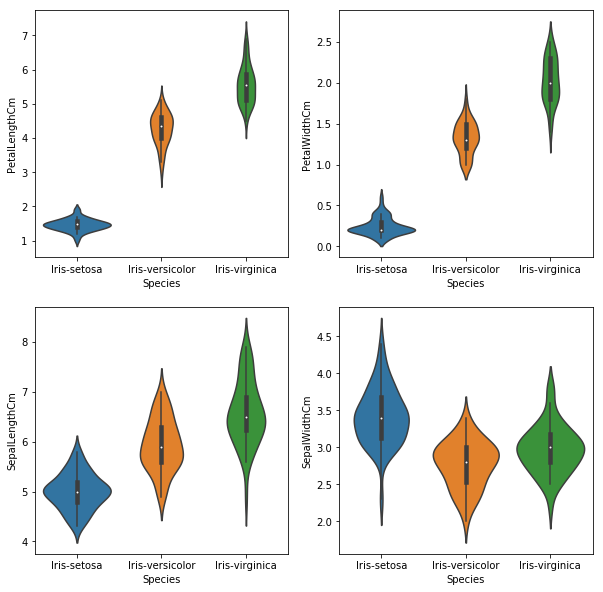

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [ ]:
# BEFORE WRAPPING UP EDA, I DO A PAIRPLOT TO LOOK AT THESE CHARACTERISTICS FOR EACH CLASS USING SCATTERPLOTS

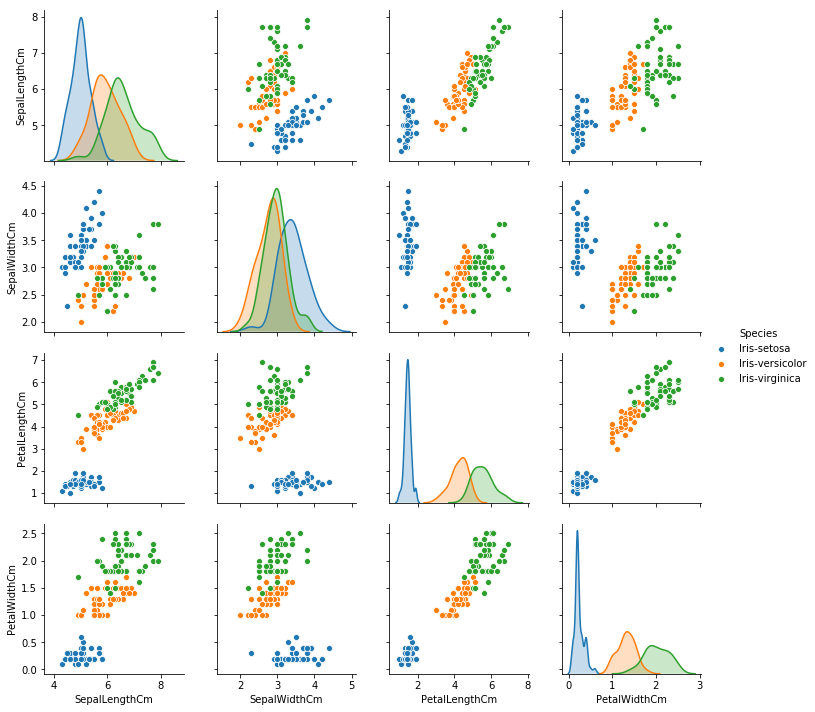

In [11]:
sns.pairplot(iris, hue="Species")

In [ ]:
# A HEATMAP IS ALSO HELPFUL WHEN USED WITH CORR() TO LOOK FOR CORRELATIONS

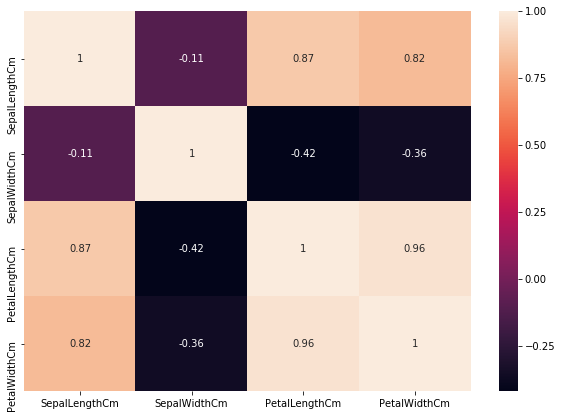

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(iris.corr(),annot = True)

# STEP #3: DATA CLEANING

In [16]:
# AFTER I'M COMFORTABLE WITH THE DATA, I PROCEED TO CLEANING THE DATA AND DROP ANY COLUMNS NOT NEEDED (ID AND SPECIES)
# I'M BASICALLY ISOLATING THE FEATURES FOR MODEL TRAINING IN THIS STEP

X = iris.drop(['Species'],axis=1)

In [17]:
X

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
5              5.4           3.9            1.7           0.4
6              4.6           3.4            1.4           0.3
7              5.0           3.4            1.5           0.2
8              4.4           2.9            1.4           0.2
9              4.9           3.1            1.5           0.1
10             5.4           3.7            1.5           0.2
11             4.8           3.4            1.6           0.2
12             4.8           3.0            1.4           0.1
13             4.3           3.0            1.1           0.1
14             5.8           4.0            1.2           0.2
15             5.7           4.4            1.5           0.4
16             5.4           3.9            1.3           0.4
17             5.1           3.5            1.4           0.3
18             5.7           3.8            1.7           0.3
19             5.1           3.8            1.5           0.3
20             5.4           3.4            1.7           0.2
21             5.1           3.7            1.5           0.4
22             4.6           3.6            1.0           0.2
23             5.1           3.3            1.7           0.5
24             4.8           3.4            1.9           0.2
25             5.0           3.0            1.6           0.2
26             5.0           3.4            1.6           0.4
27             5.2           3.5            1.5           0.2
28             5.2           3.4            1.4           0.2
29             4.7           3.2            1.6           0.2
..             ...           ...            ...           ...
120            6.9           3.2            5.7           2.3
121            5.6           2.8            4.9           2.0
122            7.7           2.8            6.7           2.0
123            6.3           2.7            4.9           1.8
124            6.7           3.3            5.7           2.1
125            7.2           3.2            6.0           1.8
126            6.2           2.8            4.8           1.8
127            6.1           3.0            4.9           1.8
128            6.4           2.8            5.6           2.1
129            7.2           3.0            5.8           1.6
130            7.4           2.8            6.1           1.9
131            7.9           3.8            6.4           2.0
132            6.4           2.8            5.6           2.2
133            6.3           2.8            5.1           1.5
134            6.1           2.6            5.6           1.4
135            7.7           3.0            6.1           2.3
136            6.3           3.4            5.6           2.4
137            6.4           3.1            5.5           1.8
138            6.0           3.0            4.8           1.8
139            6.9           3.1            5.4           2.1
140            6.7           3.1            5.6           2.4
141            6.9           3.1            5.1           2.3
142            5.8           2.7            5.1           1.9
143            6.8           3.2            5.9           2.3
144            6.7           3.3            5.7           2.5
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [ ]:
# HERE I IDENTIFY THE TARGET VARIABLE AND SET IT EQUAL TO "Y"

In [18]:
y = iris['Species']

In [19]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [20]:
# NOW THAT I HAVE MY CORE FEATURES AND Y IDENTIFIED, I NEED TO IMPORT TRAIN_TEST_SPLIT FROM SCI-KIT LEARN TO SEPARATE THE DATA INTO TRAINING AND TESTING DATA

from sklearn.model_selection import train_test_split

In [ ]:
# I USUALLY USE 20% FOR TEST SIZE, IN THIS CASE, I AM GOING TO SEE WHAT HAPPENS WITH A LARGER TEST SIZE OR 35%

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35)

In [22]:
X_train.shape

(97, 4)

In [ ]:
# THE FIRST FEW ROWS OF THE TRAINING DATA LOOK GOOD.

In [23]:
X_train.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
4              5.0           3.6            1.4           0.2
112            6.8           3.0            5.5           2.1
8              4.4           2.9            1.4           0.2
53             5.5           2.3            4.0           1.3
136            6.3           3.4            5.6           2.4

# STEP #4: TRAINING THE MODEL

In [24]:
# NOW THAT THE DATA IS READY AND I HAVE IT SEPARATED INTO TRAINING AND TESTING DATA, I CAN CREATE THE K-NEAREST NEIGHBOR CLASSIFIER
# I CHOSE KNN BECAUSE WE ARE DEALING WITH LABELED DATA AND THREE DISTINCE CLASSES. BY USING K = 5, I AM ASKING THE MODEL TO COMPARE ANY NEW OBSERVATION TO 5 EXISTING ONES AND ESSENTIALLY "TAKE A VOTE" IF IT SHOULD BELONG TO THAT GROUP OR ANOTHER (K = 5 IS A GOOD MIDDLE OF THE ROAD NUMBER, ANYTHING SMALLER AND WE MAY OVERFIT, AND BOUNDARIES BECOME SMOOTHER WITH A LARGER K)
# I'M ALSO GOING TO USE THIS STEP TO IMPORT MY MODEL EVALUATION TOOLS:  CLASSIFICATION REPORT AND CONFUSION MATRIX

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# STEP #5: EVALUATING THE MODEL

In [ ]:
# IT LOOKS LIKE ONLY 1 OBSERVATION WAS MISCLASFFIED

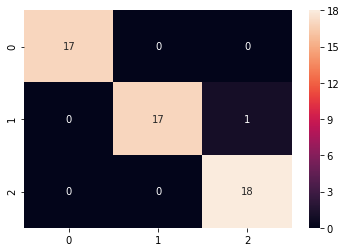

In [25]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [1]:
# THE CLASSIFICATION REPORT SHOWS 98% PRECISION, TOO. THIS IS GOOD NEWS! THIS MEANS THE MODEL IS HIGHLY ACCURATE

In [26]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.95      1.00      0.97        18

      micro avg       0.98      0.98      0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53

